In [1]:
import numpy as np
import cvxpy as cp
import tqdm as tqdm
import matplotlib.pyplot as plt


In [60]:
u_f = 1
L_f = 10

u_phi = 1
L_phi = 1

lambda_2 = 0.35**2


# M_f = np.zeros((7,7))
# M_f[4,4]= -(u_f*L_f)/(u_f+L_f)
# M_f[4,5]= 1/2
# M_f[5,4]= 1/2
# M_f[5,5]= -(1)/(u_f+L_f)


# M_phi = np.zeros((7,7))
# M_phi[4,4]= -(u_phi*L_phi)/(u_phi+L_phi)
# M_phi[4,1]= 1/2
# M_phi[1,4]= 1/2
# M_phi[1,1]= -(1)/(u_phi+L_phi)


# M_lambda = np.zeros((7,7))
# M_lambda[3,3]= -1
# M_lambda[1,1]= lambda_2
# # eta = 0.2
M_f = np.zeros((5,5))
M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
M_f[2,3]= 1/2
M_f[3,2]= 1/2
M_f[3,3]= -(1)/(u_f+L_f)


M_phi = np.zeros((5,5))
M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
M_phi[2,0]= 1/2
M_phi[0,2]= 1/2
M_phi[0,0]= -(1)/(u_phi+L_phi)


M_lambda = np.zeros((5,5))
M_lambda[4,4]= -1
M_lambda[0,0]= lambda_2
# print(M_0)
# print(M_f)
# print(M_phi)
# print(M_lambda)



A_1 = np.zeros((2,2))
A_1[1,0] = A_1[1,1] = 1
A_1_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1
A_2 = np.zeros((2,2))
A_2[0,0] = A_2[1,1] = 1
A_2_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1

B_1 = np.zeros((2,3))
B_1[0,2] = 1
B_1[1,2] = -1
B_1_eta_part = np.zeros((2,3))
B_1_eta_part[0,1] = -1
B_2 = np.zeros((2,3))
B_2[0,2] = 1
B_2[1,2] = -1
B_2_eta_part = np.zeros((2,3))
B_2_eta_part[0,1] = -1


R_2 = np.zeros((5,3))
R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

sigma_f = cp.Variable()
sigma_phi = cp.Variable()
sigma_lambda = cp.Variable()
# rho = cp.Variable()
rho = 0.999
# eta = cp.Variable()
eta = 0.1
P = cp.Variable((2, 2))
# P = np.eye(2)
MAT_temp_1 = cp.Variable((5, 5))
MAT_temp_2 = cp.Variable((5, 5))


# constraints += [rho >= 0]
# constraints += [eta >= 0]
# constraints += [rho <= 1]
constraints = [sigma_f >= 0]
constraints += [sigma_phi >= 0]
constraints += [sigma_lambda >= 0]
constraints += [P >> 0]
# questionable, P has to be PD
constraints += [P[0,0] == 1]
# otherwise it's homogeneous and has multiple optimal solutions
constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda) >> 0]
constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda)@R_2) >> 0]
constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

# (A_1 + eta*A_1_eta_part)
# (A_2 + eta*A_2_eta_part)
# (B_1 + eta*B_1_eta_part)
# (B_2 + eta*B_2_eta_part)
prob=cp.Problem(cp.Minimize(rho), constraints)
# prob=cp.Problem(cp.Maximize(rho), constraints)
prob.solve()


print("The optimal value is", prob.value)
print("A solution is")
print(sigma_f.value, sigma_phi.value)
print("P matrix is:", P.value)
print(prob.value == 0)

The optimal value is inf
A solution is
None None
P matrix is: None
False


In [61]:
u_f = 1
L_f = 10

u_phi = 1
L_phi = 1

lambda_2 = 0.35**2

M_f = np.zeros((5,5))
M_f[2,2]= -(u_f*L_f)/(u_f+L_f)
M_f[2,3]= 1/2
M_f[3,2]= 1/2
M_f[3,3]= -(1)/(u_f+L_f)

M_phi = np.zeros((5,5))
M_phi[2,2]= -(u_phi*L_phi)/(u_phi+L_phi)
M_phi[2,0]= 1/2
M_phi[0,2]= 1/2
M_phi[0,0]= -(1)/(u_phi+L_phi)

M_lambda = np.zeros((5,5))
M_lambda[4,4]= -1
M_lambda[0,0]= lambda_2

A_1 = np.zeros((2,2))
A_1[1,0] = A_1[1,1] = 1
A_1_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1
A_2 = np.zeros((2,2))
A_2[0,0] = A_2[1,1] = 1
A_2_eta_part = np.zeros((2,2))
A_1_eta_part[0,1] = -1

B_1 = np.zeros((2,3))
B_1[0,2] = 1
B_1[1,2] = -1
B_1_eta_part = np.zeros((2,3))
B_1_eta_part[0,1] = -1
B_2 = np.zeros((2,3))
B_2[0,2] = 1
B_2[1,2] = -1
B_2_eta_part = np.zeros((2,3))
B_2_eta_part[0,1] = -1

R_2 = np.zeros((5,3))
R_2[0,0] = R_2[2,1] = R_2[3,2] = 1

In [62]:
resolution = 100
eta_selection = np.linspace(0.02,0.1,resolution,endpoint=False)
rho_selection = np.linspace(0.95,1,resolution,endpoint=False)
viable = np.zeros((resolution,resolution))
for i, eta in tqdm.tqdm(enumerate(eta_selection)):
    for j, rho in enumerate(rho_selection):
        constraints = [sigma_f >= 0]
        constraints += [sigma_phi >= 0]
        constraints += [sigma_lambda >= 0]
        constraints += [P >> 0]
        # questionable, P has to be PD
        constraints += [P[0,0] == 1]
        # otherwise it's homogeneous and has multiple optimal solutions
        constraints += [(-MAT_temp_1 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda) >> 0]
        constraints += [MAT_temp_1[0:2,0:2] == ((A_1 + eta*A_1_eta_part).T@P@(A_1 + eta*A_1_eta_part) - rho*P)]
        constraints += [MAT_temp_1[0:2,2:5] == ((A_1 + eta*A_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]
        constraints += [MAT_temp_1[2:,:2] == ((B_1 + eta*B_1_eta_part).T@P@(A_1 + eta*A_1_eta_part))]
        constraints += [MAT_temp_1[2:,2:] == ((B_1 + eta*B_1_eta_part).T@P@(B_1 + eta*B_1_eta_part))]

        constraints += [(R_2.T@(-MAT_temp_2 - sigma_f*M_f - sigma_phi*M_phi - sigma_lambda*M_lambda)@R_2) >> 0]
        constraints += [MAT_temp_2[0:2,0:2] == ((A_2 + eta*A_2_eta_part).T@P@(A_2 + eta*A_2_eta_part) - rho*P)]
        constraints += [MAT_temp_2[0:2,2:5] == ((A_2 + eta*A_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]
        constraints += [MAT_temp_2[2:,:2] == ((B_2 + eta*B_2_eta_part).T@P@(A_2 + eta*A_2_eta_part))]
        constraints += [MAT_temp_2[2:,2:] == ((B_2 + eta*B_2_eta_part).T@P@(B_2 + eta*B_2_eta_part))]

        # (A_1 + eta*A_1_eta_part)
        # (A_2 + eta*A_2_eta_part)
        # (B_1 + eta*B_1_eta_part)
        # (B_2 + eta*B_2_eta_part)
        prob=cp.Problem(cp.Minimize(rho), constraints)
#         prob.setSolverParam("numThreads", 4)
        # prob=cp.Problem(cp.Maximize(rho), constraints)
        try:
            prob.solve()
#             prob.solve(solver=MOSEK, mosek_params={mosek.iparam.num_threads: 8})
        except:
            continue
        if prob.status not in ["infeasible", "unbounded"]:
            print("Problem is solvable for eta, rho:", eta, rho)
            viable[i,j] = 1
    

100it [04:19,  2.60s/it]


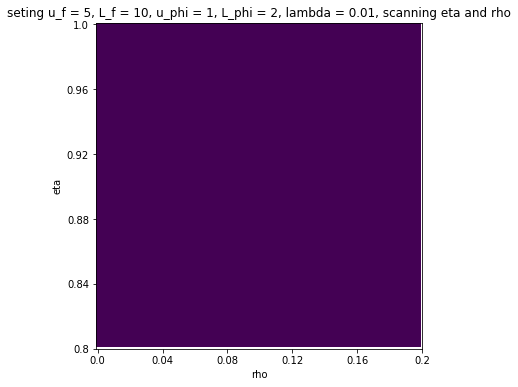

In [63]:
# viable
plt.figure(figsize=(8, 6))

plt.imshow(np.flip(np.transpose(viable), axis=0))
plt.xlabel("rho")
plt.ylabel("eta")
tick_num = 6

plt.yticks(np.linspace(0,resolution, tick_num,endpoint=True), np.around(np.linspace(1,0.8, tick_num,endpoint=True),2))
plt.xticks(np.linspace(0,resolution, tick_num,endpoint=True), np.around(np.linspace(0,0.2, tick_num,endpoint=True),2))
plt.title("seting u_f = 5, L_f = 10, u_phi = 1, L_phi = 2, lambda = 0.01, scanning eta and rho")
plt.savefig("distributed_2")
plt.show()